In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dt_train_1 = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Train.csv')

In [12]:
open_train_1 = dt_train_1.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
open_train_1 = scaler .fit_transform(open_train_1)
X_train_1 = open_train_1[0:1257]
y_train_1 = open_train_1[1:1258]
X_train_1 = np.reshape(X_train_1, (1257, 1, 1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [109]:
reg_1 = Sequential()

reg_1.add(LSTM(units = 5, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))

reg_1.add(LSTM(units = 5))

reg_1.add(Dense(units = 1))
reg_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

reg_1.fit(X_train_1, y_train_1, batch_size = 32, epochs = 50)

Epoch 1/50
40/40 [==============================] - 4s 2ms/step - loss: 0.3015
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2304
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1749
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1231
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0823
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 11/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 12/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 13/50
40/40 [==============================

In [110]:
dt_test_1 = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Test.csv')
real_price_1 = dt_test_1.iloc[:,1:2].values

In [111]:
value1 = real_price_1
value1 = scaler.transform(value1)
value1 = np.reshape(value1, (20, 1,1))
predicted_price_1 = reg_1.predict(value1)
predicted_price_1 = scaler.inverse_transform(predicted_price_1 )

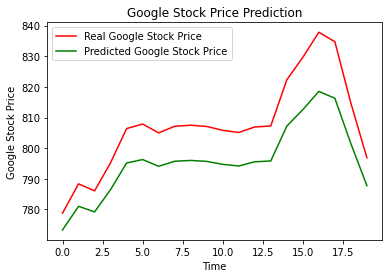

In [112]:
plt.plot(real_price_1, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price_1, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [113]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_price_1, predicted_price_1))
print(rmse)

12.184699278614445


In [114]:
real_all_1 = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Train.csv')
real_all_1 = real_all_1.iloc[:,1:2].values
predicted_all_1 = reg_1.predict(X_train_1)
predicted_all_1 = scaler.inverse_transform(predicted_all_1)

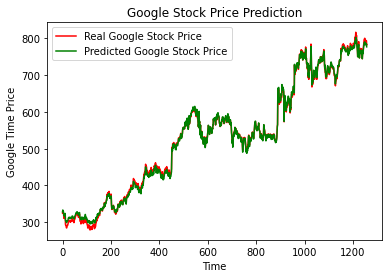

In [115]:
plt.plot(real_all_1, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_all_1, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()
